[View in Colaboratory](https://colab.research.google.com/github/vpw/EIP2/blob/master/DNN.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
import skimage

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Conv2DTranspose, AveragePooling2D, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from skimage import color, exposure

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)


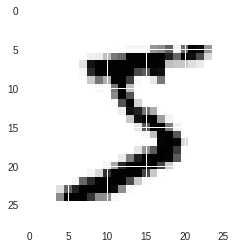

In [4]:
print (X_train.shape)
print (X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
'''model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(SeparableConv2D(16, 3, activation='relu'))
model.add(Conv2D(8, 3, activation='relu'))
model.add(Conv2D(16,1, activation='relu'))
model.add(SeparableConv2D(16, 3, activation='relu'))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(10,3, activation='relu'))
model.add(Conv2D(10,3, activation='relu'))
model.add(Conv2D(10,3, activation='relu'))
model.add(Conv2D(10,4, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))'''
model.add(Conv2D(32, kernel_size=(11, 11), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
#64, 18
model.add(Conv2D(128, 1, activation='relu'))
model.add(BatchNormalization(axis=-1))
#128, 18
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#32, 8
'''model.add(Conv2DTranspose(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#16, 9
model.add(Conv2DTranspose(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))'''
#16, 11
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 6
model.add(SeparableConv2D(16, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#16, 4
#model.add(Conv2D(16, 3, activation='relu'))
#model.add(BatchNormalization(axis=-1))
#16, 3
model.add(Flatten())
#1, 16*16
model.add(Dense(10, activation='softmax'))
#model.add(Activation('softmax'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 18, 18, 32)        3904      
_________________________________________________________________
batch_normalization_71 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 18, 18, 128)       4224      
_________________________________________________________________
batch_normalization_72 (Batc (None, 18, 18, 128)       512       
_________________________________________________________________
separable_conv2d_42 (Separab (None, 16, 16, 32)        5280      
_________________________________________________________________
batch_normalization_73 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
##def AdaptiveHistEq(img):
##    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
##    return img_adapteq


#datagen = ImageDataGenerator(
 #featurewise_center=True,
  #  featurewise_std_normalization=True,
   # validation_split=0.2
 ##   preprocessing_function=AdaptiveHistEq
    )
##rotation_range=20
    ##width_shift_range=0.2,
    ##height_shift_range=0.2
##featurewise_center=True,
##    featurewise_std_normalization=True,
    ##zca_whitening=True

#datagen.fit(X_train)


In [0]:
# visualize the fitted images

for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=5):
  for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i].reshape(28,28), cmap= plt.get_cmap('gray'))
    plt.show()
    break

In [79]:

#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=5),
#                    steps_per_epoch=len(X_train) / 20, epochs=12)

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 44s 741us/step - loss: 0.1919 - acc: 0.9404
Epoch 2/20
60000/60000 [==============================] - 42s 706us/step - loss: 0.0707 - acc: 0.9777
Epoch 3/20
60000/60000 [==============================] - 44s 729us/step - loss: 0.0558 - acc: 0.9829
Epoch 4/20
60000/60000 [==============================] - 44s 725us/step - loss: 0.0508 - acc: 0.9842
Epoch 5/20
60000/60000 [==============================] - 44s 727us/step - loss: 0.0420 - acc: 0.9866
Epoch 6/20
60000/60000 [==============================] - 44s 730us/step - loss: 0.0385 - acc: 0.9875
Epoch 7/20
60000/60000 [==============================] - 44s 729us/step - loss: 0.0353 - acc: 0.9888
Epoch 8/20
60000/60000 [==============================] - 44s 730us/step - loss: 0.0309 - acc: 0.9901
Epoch 9/20
60000/60000 [==============================] - 44s 725us/step - loss: 0.0296 - acc: 0.9908
Epoch 10/20
60000/60000 [==============================] - 43s 723us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [81]:
print(score)

[0.03537192779433754, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [96]:
print(y_pred[:9])
print(y_test[:9])

[[2.2968583e-04 8.9119521e-06 4.6454199e-02 7.6202596e-08 3.6094109e-06
  3.1804422e-05 2.6559009e-04 1.1354684e-05 9.5299470e-01 8.4761773e-08]
 [1.2301754e-03 5.1601764e-05 8.3863443e-01 1.2332234e-07 4.1556982e-06
  1.7607757e-05 1.7765517e-03 1.2103624e-06 1.5828338e-01 7.9621253e-07]
 [1.9940786e-04 4.5936387e-05 7.2092652e-02 9.6050572e-09 2.1086951e-06
  7.3239571e-05 1.2255270e-03 4.8203010e-06 9.2635614e-01 1.6045234e-07]
 [4.9569819e-02 4.3081509e-05 3.3645049e-01 9.7284728e-06 6.2930696e-03
  8.3903148e-04 1.8130478e-02 6.9831891e-05 5.8855474e-01 3.9798619e-05]
 [7.6912096e-07 2.0712261e-07 5.7515860e-02 1.0032482e-08 2.6221949e-06
  3.6172312e-06 2.9816189e-05 3.5229380e-07 9.4244671e-01 5.7691194e-09]
 [3.2850989e-04 6.9222995e-05 8.5270487e-02 2.5864781e-08 2.1458268e-06
  5.6184061e-05 5.5856770e-04 1.1048883e-05 9.1370362e-01 1.8836502e-07]
 [2.4668475e-06 1.1089660e-06 4.3533109e-03 3.0714144e-08 2.2527735e-07
  1.7191598e-05 5.0705225e-06 2.6942466e-08 9.9562031e-01 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

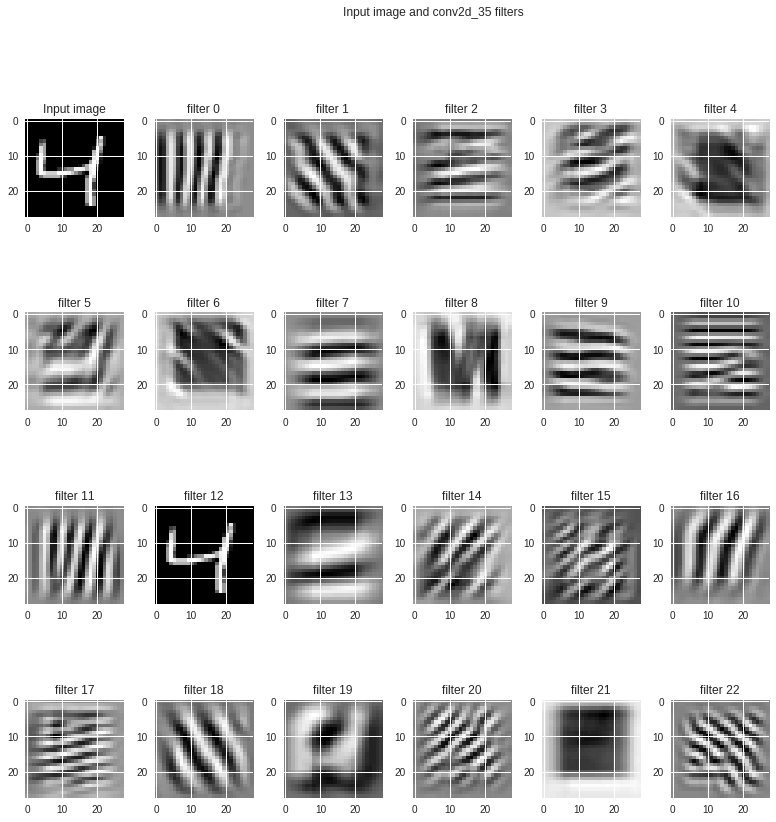

In [92]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_35')